<a href="https://colab.research.google.com/github/rglopesdf/GenAI/blob/main/ClippingGPT_4o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Configuração

In [ ]:
pip install openai pyPDF2 tiktoken gdown

In [ ]:
import openai as client
import pandas as pd
from google.colab import userdata
import importlib
import gdown

In [ ]:
def getGoogleDriveFile (id, dest, quiet=False):
  # URL do arquivo do Google Drive
  url = f"https://drive.google.com/uc?id={id}"
  print(url)
  # Diretório onde o arquivo será salvo
  output = f'/content/{dest}'  # Substitua 'arquivo_baixado.ext' pelo nome e extensão do arquivo
  # Baixar o arquivo
  print(output)
  gdown.download(url, output, quiet=quiet)


In [ ]:
#Download Arquivo utils.py
id = '1twoi7Cemr4LJPVchA3ZMF7LujEGaFSvo'
dest = 'utils.py'
getGoogleDriveFile(id, dest, quiet=True)


#DownLoad Arquivo BB2t23.pdf
id = '100RTP7IdBA8hO145KeA-qo77XUbsPNXX'
dest = 'BB2T23.pdf'
getGoogleDriveFile(id, dest, quiet=True)

#Download Arquivo ITUB2T23.pdf
id = '1PZiNJwIF5jVmrimAoxW6usMRpCtP55Tf'
dest = 'ITUB2T23.pdf'
getGoogleDriveFile(id, dest, quiet=True)


In [ ]:
import utils as ut

## Início

In [ ]:
#Definir o modelo do gpt
gptModel35 = "gpt-3.5-turbo-0125"
gptModel4 = "gpt-4-turbo"
gptModel4o = "gpt-4o"

gptModel = gptModel4o

#Configurando a chave da OpenAI, a partir da chave guardada no Colab
client.api_key = userdata.get('openAI_key')

In [ ]:
prompt = "Qual foi o resultado do Itaú-Unibanco no 3T23?"

response = ut.ExecutarPrompt(prompt, client, gptModel)
print(f"Resposta do modelo {gptModel}")
ut.print_in_box(response, 100)

Resposta do modelo gpt-4o
----------------------------------------------------------------------------------------------------
| Até a data do meu último treinamento em outubro de 2023, não tenho acesso a informações em       |
| tempo real ou atualizações financeiras específicas após essa data. Para obter o resultado do     |
| Itaú-Unibanco no terceiro trimestre de 2023 (3T23), recomendo consultar fontes confiáveis como   |
| o site oficial do Itaú-Unibanco, comunicados à imprensa, relatórios financeiros trimestrais, ou  |
| plataformas de notícias financeiras. Esses documentos geralmente são disponibilizados            |
| publicamente e contêm informações detalhadas sobre o desempenho financeiro da empresa.           |
----------------------------------------------------------------------------------------------------


In [ ]:
textoItau = ut.extrair_texto_pdf('ITUB2T23.pdf')
print(textoItau[:200])

1
Corporativo | Interno
resultados  3T23
São Paulo, 7 de novembro de 20232
Corporativo | Interno
ROE
recorrente 
gerencial
receita de 
serviços e 
seguros ¹custo 
do crédito
NPL 
> 90
diasíndice de 
c


In [ ]:
ut.count_token(textoItau, gptModel)

7794

In [ ]:
prompt = f"""
#Início do Relatório
{textoItau}
#Fim do Relatório

Qual foi o resultado do Itaú-Unibanco no 3T23?
"""
gptModel = gptModel4o
response = ut.ExecutarPrompt(prompt, client, gptModel)
print(f"Resposta do modelo {gptModel}")
ut.print_in_box(response, 100)

Resposta do modelo gpt-4o
----------------------------------------------------------------------------------------------------
| O resultado recorrente gerencial do Itaú-Unibanco no terceiro trimestre de 2023 (3T23) foi de    |
| R$ 9,0 bilhões, representando um crescimento de 3,4% em relação ao segundo trimestre de 2023     |
| (2T23) e um aumento de 11,9% em comparação ao terceiro trimestre de 2022 (3T22).                 |
----------------------------------------------------------------------------------------------------


Tarefa:

> Elaborar um resumo do resultado do Itaú-Unibanco, destacando os 3 principais indicadores e explicando o significado de cada um deles.
> Você deverá produzir o relatório para dois tipos de clientes: um expert em mercado financeiro e um leigo neste tema.
> Os relatórios deverão estar disponíveis em Português e Inglês



In [ ]:
""""


CONTEXTO:





TAREFA:




FORMATO DA RESPOSTA:






"""

""""

In [ ]:
prompt = f"""
### Quem é você
Você é um gerente de carteira de investimentos e sua tarefa é
produzir clippings sobre relatórios de resultados financeiros de instituições de
capital aberto.
###

###Início do Relatório
{textoItau}
###Fim do Relatório

### Tarefas
 1. Identificar o nome da instituição financeira contido no relatório.
 2. Selecionar os 3 principais indicadores financeiros, contidos no relatório, que
    demonstrem a saúde financeira da instituição.
 3. Explicar o significado de cada um desses indicadores, ensinando como interpretá-los.
###

### Formato da Resposta
 Formato: Clipping
 Língua: Português
 Público-alvo: Expert em mercado financeiro
###

"""

resposta = ut.ExecutarPrompt(prompt, client, gptModel)
print(resposta)

### Clipping

**Instituição Financeira:**
Itaú Unibanco

**Principais Indicadores Financeiros:**

1. **ROE (Retorno sobre o Patrimônio Líquido) Recorrente Gerencial**
   - **Valor:** 22,0% Brasil, 21,1% Consolidado
   - **Significado:** O ROE mede a rentabilidade da instituição em relação ao patrimônio líquido dos acionistas. Um ROE de 22,0% indica que, para cada R$ 1,00 de patrimônio líquido, o Itaú Unibanco gerou R$ 0,22 de lucro. Este indicador é crucial para avaliar a eficiência da instituição em gerar lucros a partir dos recursos dos acionistas. Um ROE elevado sugere uma gestão eficiente e uma boa capacidade de gerar retornos.

2. **Índice de Capital Nível 1**
   - **Valor:** 14,6%
   - **Significado:** O Índice de Capital Nível 1 é uma medida da solidez financeira do banco, representando a proporção do capital de alta qualidade (capital principal) em relação aos ativos ponderados pelo risco. Um índice de 14,6% indica que o Itaú Unibanco possui um capital robusto para absorver per

In [ ]:
prompt = f"""
### Quem é você
Você é um gerente de carteira de investimentos e sua tarefa é
produzir clippings sobre relatórios de resultados financeiros de instituições de
capital aberto.
###

###Início do Relatório
{textoItau}
###Fim do Relatório

### Tarefas
 1. Identificar o nome da instituição financeira contido no relatório.
 2. Selecionar os 3 principais indicadores financeiros, contidos no relatório, que
    demonstrem a saúde financeira da instituição.
 3. Explicar o significado de cada um desses indicadores, ensinando como interpretá-los.
###

### Formato da Resposta
 Formato: financial summary
 Versões do Relatório:
  Língua: Português e Público-alvo: Expert em mercado financeiro
  Língua: Inglês e Público-alvo: Expert em mercado financeiro
###

"""

resposta = ut.ExecutarPrompt(prompt, client, gptModel)
print(resposta)

### Financial Summary

#### Versão em Português

**Nome da Instituição Financeira:**
Itaú Unibanco

**Principais Indicadores Financeiros:**

1. **ROE (Retorno sobre o Patrimônio Líquido) Recorrente Gerencial:**
   - **Valor:** 22,0% Brasil, 21,1% Consolidado
   - **Significado:** O ROE mede a rentabilidade da empresa em relação ao patrimônio líquido dos acionistas. Um ROE de 22,0% indica que, para cada R$ 1,00 de patrimônio líquido, a empresa gerou R$ 0,22 de lucro. Um ROE elevado sugere que a empresa está utilizando eficientemente o capital dos acionistas para gerar lucros.

2. **Resultado Recorrente Gerencial:**
   - **Valor:** R$ 9,0 bilhões
   - **Significado:** Este indicador representa o lucro líquido ajustado por itens não recorrentes, oferecendo uma visão mais clara da performance operacional da empresa. Um resultado recorrente gerencial de R$ 9,0 bilhões indica uma forte capacidade de geração de lucro de forma consistente, excluindo efeitos extraordinários.

3. **Índice de Cap

In [ ]:
prompt = f"""
### Quem é você
Você é um gerente de carteira de investimentos e sua tarefa é
produzir clippings sobre relatórios de resultados financeiros de instituições de
capital aberto.
###

###Início do Relatório
{textoItau}
###Fim do Relatório

### Tarefas
 1. Identificar o nome da instituição financeira contido no relatório.
 2. Selecionar os 3 principais indicadores financeiros, contidos no relatório, que
    demonstrem a saúde financeira da instituição.
 3. Explicar o significado de cada um desses indicadores, ensinando como interpretá-los.
###

### Resposta
 Modelo: financial summary
 Versões do Relatório:
  Língua: Português e Público-alvo: Expert em mercado financeiro
 Formato: HTML sem imagens (Sem incluir a tag ``` no início e fim da resposta)

###

"""

resposta = ut.ExecutarPrompt(prompt, client, gptModel)
print(resposta)

<!DOCTYPE html>
<html lang="pt-BR">
<head>
    <meta charset="UTF-8">
    <title>Resumo Financeiro</title>
</head>
<body>
    <h1>Resumo Financeiro</h1>
    <h2>Instituição Financeira</h2>
    <p>A instituição financeira mencionada no relatório é o <strong>Itaú Unibanco</strong>.</p>

    <h2>Principais Indicadores Financeiros</h2>
    <ol>
        <li><strong>ROE (Retorno sobre o Patrimônio Líquido) Recorrente Gerencial</strong></li>
        <li><strong>Margem Financeira com Clientes</strong></li>
        <li><strong>Índice de Capital Nível 1</strong></li>
    </ol>

    <h3>Explicação dos Indicadores</h3>
    <h4>1. ROE (Retorno sobre o Patrimônio Líquido) Recorrente Gerencial</h4>
    <p>O ROE é um indicador que mede a rentabilidade de uma empresa em relação ao patrimônio líquido dos acionistas. Ele é calculado dividindo-se o lucro líquido pelo patrimônio líquido. No relatório, o ROE recorrente gerencial foi de 22,0% no Brasil e 21,1% consolidado. Um ROE elevado indica que a empresa

In [ ]:
ut.generateFile(resposta,'clipping2.html')

In [ ]:
ut.showHTML('clipping2.html')

In [ ]:
prompt = f"""
#Início do Relatório
{textoItau}
#Fim do Relatório

Retorne 3 indicadores importantes, que existam nesse relatório, que possuam
informações históricas de evolução, de pelo menos 3 trimestres anteriores.

Retorne no seguinte formato csv válido ((nao informe ``` no início, nem no final))
nome_indicador
valor_indicador (valor numérico)
data_referencia (dd/mm/aaaa)

"""

resposta = ut.ExecutarPrompt(prompt, client, gptModel)
print(resposta)

nome_indicador,valor_indicador,data_referencia
margem média anualizada consolidado,5.6,30/09/2023
margem média anualizada consolidado,5.4,30/06/2023
margem média anualizada consolidado,5.3,31/03/2023
margem média anualizada consolidado,5.1,31/12/2022
margem média anualizada consolidado,5.6,30/09/2022
NPL 90 dias - Brasil,3.0,30/09/2023
NPL 90 dias - Brasil,3.0,30/06/2023
NPL 90 dias - Brasil,2.9,31/03/2023
NPL 90 dias - Brasil,2.8,31/12/2022
NPL 90 dias - Brasil,2.7,30/09/2022
custo do crédito,9.3,30/09/2023
custo do crédito,9.4,30/06/2023
custo do crédito,8.0,30/09/2022


In [ ]:
df = ut.string_to_dataframe(resposta)
df.describe(include='all')

,nome_indicador,valor_indicador,data_referencia
count,13,13.000000,13
unique,3,NaN,5
top,margem média anualizada consolidado,NaN,30/09/2023
freq,5,NaN,3
mean,NaN,5.238462,NaN
std,NaN,2.408851,NaN
min,NaN,2.700000,NaN
25%,NaN,3.000000,NaN
50%,NaN,5.300000,NaN
75%,NaN,5.600000,NaN


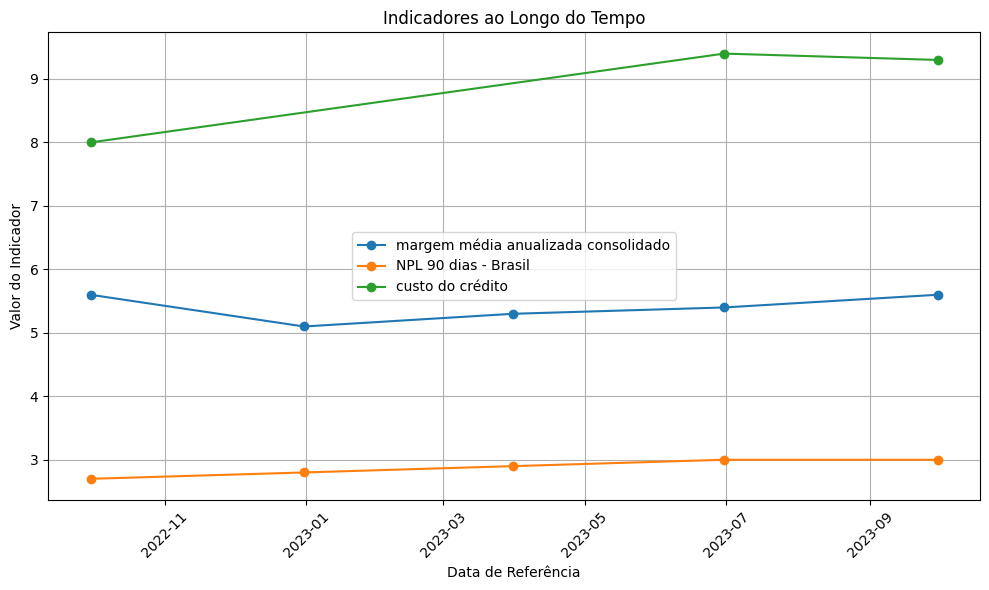

In [ ]:
ut.plotIndicadores(df, 'nome_indicador', 'data_referencia', 'valor_indicador')

In [ ]:
textoBB = ut.extrair_texto_pdf('BB2T23.pdf')
print(textoBB[:200])


 
Análise do Desempenho 3T23   
 
 
 
 Banco do Brasil S.A.  1  
 Sumário  
do Resultado  
O Banco do Brasil registrou lucro líquido ajustado de R$ 8,8 
bilhões no 3T23, mantendo -se estável no trimes


In [ ]:
ut.count_token(prompt, gptModel)

7885

In [ ]:
prompt = f"""
#Início do Relatório 1
{textoBB}
#Fim do Relatório 1

#Início do Relatório 2
{textoItau}
#Fim do Relatório 2


Retorne 3 indicadores importantes, que existam nos dois relatórios (os mesmos indicadores para os dois bancos), que possuam
informações históricas de evolução, de pelo menos 3 trimestres anteriores.

Retorne no seguinte formato csv válido (nao informa ```csv no início, nem no final):
nome_indicador (nome indicador + nome da instituição)
valor_indicador (valor numérico)
data_referencia (dd/mm/aaaa)

"""

resposta = ut.ExecutarPrompt(prompt, client, gptModel)
print(resposta)

nome_indicador,valor_indicador,data_referencia
Margem Financeira Bruta (Banco do Brasil),19.558,30/09/2022
Margem Financeira Bruta (Banco do Brasil),22.887,30/06/2023
Margem Financeira Bruta (Banco do Brasil),23.680,30/09/2023
Margem Financeira Bruta (Itaú Unibanco),23.900,30/09/2022
Margem Financeira Bruta (Itaú Unibanco),26.000,30/06/2023
Margem Financeira Bruta (Itaú Unibanco),26.300,30/09/2023
Lucro Líquido Ajustado (Banco do Brasil),8.403,30/09/2022
Lucro Líquido Ajustado (Banco do Brasil),8.785,30/06/2023
Lucro Líquido Ajustado (Banco do Brasil),8.785,30/09/2023
Lucro Líquido Ajustado (Itaú Unibanco),8.100,30/09/2022
Lucro Líquido Ajustado (Itaú Unibanco),8.700,30/06/2023
Lucro Líquido Ajustado (Itaú Unibanco),9.000,30/09/2023
Receitas de Prestação de Serviços (Banco do Brasil),8.524,30/09/2022
Receitas de Prestação de Serviços (Banco do Brasil),8.286,30/06/2023
Receitas de Prestação de Serviços (Banco do Brasil),8.670,30/09/2023
Receitas de Prestação de Serviços (Itaú Unibanco),

In [ ]:
df = ut.string_to_dataframe(resposta)
df.describe(include='all')

,nome_indicador,valor_indicador,data_referencia
count,18,18.000000,18
unique,6,NaN,3
top,Margem Financeira Bruta (Banco do Brasil),NaN,30/09/2022
freq,3,NaN,6
mean,NaN,13.948778,NaN
std,NaN,7.269191,NaN
min,NaN,8.100000,NaN
25%,NaN,8.677500,NaN
50%,NaN,9.700000,NaN
75%,NaN,22.054750,NaN


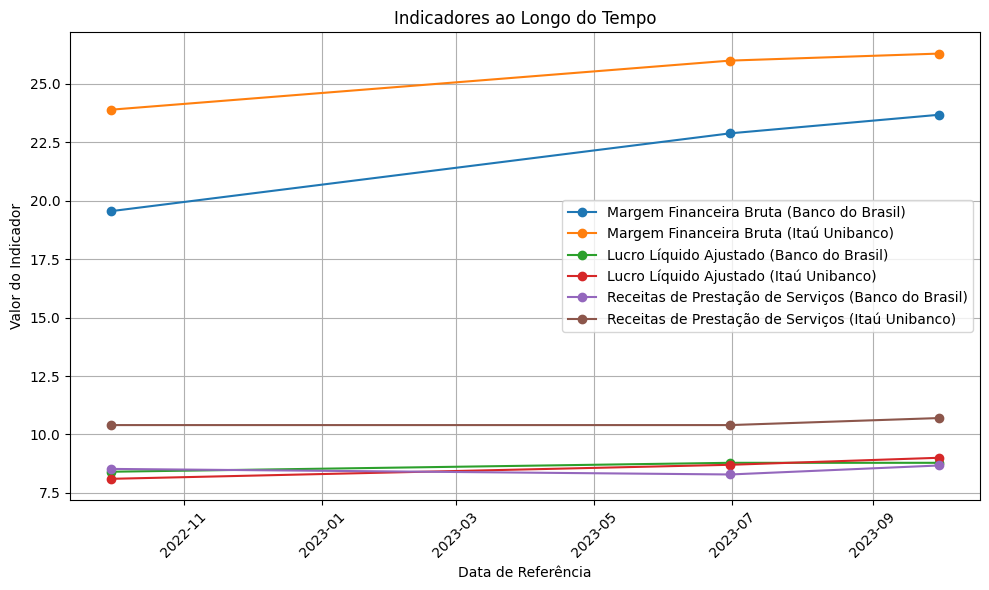

In [ ]:
ut.plotIndicadores(df, 'nome_indicador', 'data_referencia', 'valor_indicador')

In [ ]:
!pip install IPython requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.5 MB/s eta 0:00:00


In [ ]:
from IPython.display import Audio
import requests
model_id = []
model_id.append("eleven_multilingual_v2")
model_id.append("eleven_turbo_v2")
model_id

voice_id = []
voice_id.append("vibfi5nlk3hs8Mtvf9Oy") #Ana
voice_id.append("RXxUlSBZ22w6iBvoL5Yv") #Rogerio Instance
voice_id.append("YVa69Z3KhDCTuxhyIwlN") #Rogerio Instance 2
voice_id.append("gULBkQjcYnFwyExUU90w") #Rogerio Professional
voice_id

['vibfi5nlk3hs8Mtvf9Oy',
 'RXxUlSBZ22w6iBvoL5Yv',
 'YVa69Z3KhDCTuxhyIwlN',
 'gULBkQjcYnFwyExUU90w']

In [ ]:
%%time
def tts(texto,model_id, voice_id):

  xi_api_key = "1dfbc01c47f8a5580175890f34bab299"
  CHUNK_SIZE = 1024
  url = f"https://api.elevenlabs.io/v1/text-to-speech/{voice_id}"

  headers = {
    "Accept": "audio/mpeg",
    "Content-Type": "application/json",
    "xi-api-key": "1dfbc01c47f8a5580175890f34bab299"
  }

  data = {
    "text": texto,
    "model_id": f"{model_id}",
    "voice_settings": {
      "stability": 0,
      "similarity_boost": 1,
      "style": 0.5,
      "use_speaker_boost": "false"
    },
    "seed":1234
  }

  response = requests.post(url, json=data, headers=headers)
  path_to_audio_file = f'gpt_answer.mp3'
  with open(path_to_audio_file, 'wb') as f:
      for chunk in response.iter_content(chunk_size=CHUNK_SIZE):
          if chunk:
              f.write(chunk)
  return path_to_audio_file

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10 µs


In [ ]:
prompt = f"""

Qual é a composição acionária da Elopar? Responda em até 20 palavras
"""
#print(prompt)

resposta = ut.ExecutarPrompt(prompt, client, gptModel)
ut.print_in_box(resposta, 100)

----------------------------------------------------------------------------------------------------
| A Elopar é uma holding controlada pelo Banco do Brasil e pelo Bradesco, com participação         |
| acionária de 49,99% e 50,01%, respectivamente.                                                   |
----------------------------------------------------------------------------------------------------


In [ ]:
fileAudio = tts(resposta,model_id[0], voice_id[1])
Audio(filename=fileAudio)

In [ ]:
fileAudio = tts(resposta,model_id[0], voice_id[0])
Audio(filename=fileAudio)